```
Final Project 1 - Linear Regression

Anggota Kelompok:
Cindo Fara Aqsyada A - PYTN-KS09-013
Pipin Puspa N - PYTN-KS09-014
Naufal Afif S - PYTN-KS09-015

Link Deploy:
https://fp1-regression.herokuapp.com/
```

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
# pd.set_option('display.max_columns', 30)
# pd.set_option('display.max_rows', 200)
# pd.set_option('display.float_format', lambda x: '%.2f' % x)
import numpy as np 
import seaborn as sns
import scipy
import warnings
warnings.filterwarnings('ignore')

# Project Overview
Database ini memiliki 57 atribut, tetapi yang paling relevan ada 10 atribut dari semuanya.
Final Project 1 ini dibuat guna mengevaluasi konsep Regression sebagai berikut:
● Mampu memahami konsep regression dengan Linear Regression
● Mampu mempersiapkan data untuk digunakan dalam model Linear Regression
● Mampu mengimplementasikan Linear Regression untuk membuat prediksi

## Attribute Information:
***The Data FROM : https://www.kaggle.com/datasets/brllrb/uber-and-lyft-dataset-boston-ma***
1. id
2. timestamp
3. hour
4. day
5. month
6. datetime
7. timezone
8. source: destinasi awal
9. destination: destinasi akhir
10. cab_type: tipe transportasi (uber / lyft)
11. … dan lainnya

In [2]:
df = pd.read_csv('dataset/rideshare_kaggle.csv')
df

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693068,64d451d0-639f-47a4-9b7c-6fd92fbd264f,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


### Filtering through name column 

In [3]:
df['name'].value_counts()

UberXL          55096
WAV             55096
Black SUV       55096
Black           55095
Taxi            55095
UberX           55094
UberPool        55091
Lux             51235
Lyft            51235
Lux Black XL    51235
Lyft XL         51235
Lux Black       51235
Shared          51233
Name: name, dtype: int64

In [4]:
uber_dataset = df[df['name'].isin(['Shared', 'UberPool', 'Black SUV', 'UberX', 'Taxi', 'Lux']) ]

In [5]:
uber_dataset.shape

(322844, 57)

# EDA

In [6]:
uber_dataset.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
8,4f9fee41-fde3-4767-bbf1-a00e108701fb,1.543818e+09,6,3,12,2018-12-03 06:28:02,America/New_York,Back Bay,Northeastern University,Lyft,...,0.0004,1543852800,43.09,1543896000,57.02,1543852800,39.90,1543896000,56.35,1543852800
10,9043bf77-1d45-4a93-9520-a083e0277f16,1.543594e+09,16,30,11,2018-11-30 16:13:03,America/New_York,Back Bay,Northeastern University,Lyft,...,0.0004,1543593600,28.64,1543579200,42.32,1543600800,29.29,1543579200,40.48,1543611600
14,357559cb-8c58-4278-a41a-e33b2e0997a3,1.544729e+09,19,13,12,2018-12-13 19:15:03,America/New_York,North End,West End,Uber,...,0.0001,1544716800,18.29,1544688000,33.83,1544731200,13.79,1544688000,32.85,1544734800


In [7]:
# Check Data type
uber_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 322844 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           322844 non-null  object 
 1   timestamp                    322844 non-null  float64
 2   hour                         322844 non-null  int64  
 3   day                          322844 non-null  int64  
 4   month                        322844 non-null  int64  
 5   datetime                     322844 non-null  object 
 6   timezone                     322844 non-null  object 
 7   source                       322844 non-null  object 
 8   destination                  322844 non-null  object 
 9   cab_type                     322844 non-null  object 
 10  product_id                   322844 non-null  object 
 11  name                         322844 non-null  object 
 12  price                        267749 non-null  float64
 13 

In [8]:
# 5 number summary
uber_dataset.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,3.228440e+05,322844.000000,322844.000000,322844.000000,267749.000000,322844.000000,322844.000000,322844.000000,322844.000000,322844.000000,...,322844.000000,3.228440e+05,322844.000000,3.228440e+05,322844.000000,3.228440e+05,322844.000000,3.228440e+05,322844.000000,3.228440e+05
mean,1.544047e+09,11.611986,17.793380,11.587045,14.596878,2.189991,1.005900,42.338073,-71.066162,39.586898,...,0.037368,1.544045e+09,33.458969,1.544042e+09,45.263932,1.544048e+09,29.730870,1.544049e+09,41.997339,1.544049e+09
std,6.893543e+05,6.945794,9.977869,0.492366,9.573120,1.150471,0.059262,0.047918,0.020321,6.719967,...,0.055194,6.913761e+05,6.468837,6.903767e+05,5.647543,6.903028e+05,7.113967,6.873598e+05,6.941223,6.912309e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,...,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,7.500000,1.280000,1.000000,42.350300,-71.081000,36.500000,...,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543738e+09,12.000000,17.000000,12.000000,10.500000,2.170000,1.000000,42.351900,-71.063100,40.490000,...,0.000400,1.543770e+09,34.240000,1.543727e+09,44.660000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.880000,1.000000,42.364700,-71.054200,43.580000,...,0.091600,1.544807e+09,38.880000,1.544789e+09,46.910000,1.544814e+09,35.710000,1.544789e+09,44.120000,1.544818e+09
max,1.545161e+09,23.000000,30.000000,12.000000,89.500000,7.860000,2.000000,42.366100,-71.033000,57.220000,...,0.145900,1.545152e+09,43.100000,1.545192e+09,57.870000,1.545109e+09,40.050000,1.545134e+09,57.200000,1.545109e+09


In [9]:
# Check missing value
uber_dataset.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

## Feature Engineering & Pre-Processing

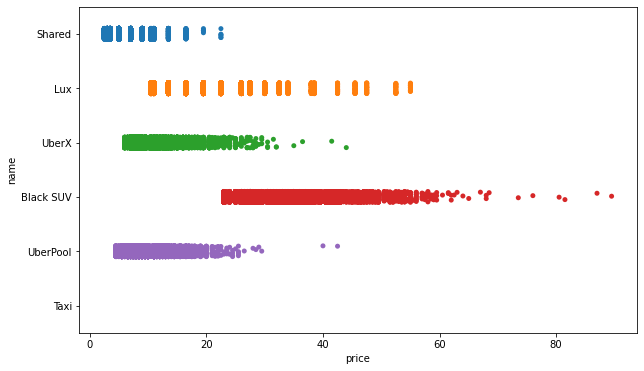

In [10]:
fig,ax = plt.subplots(figsize=(10,6))
sns.stripplot(data=uber_dataset, x='price', y='name');

<AxesSubplot:xlabel='price', ylabel='icon'>

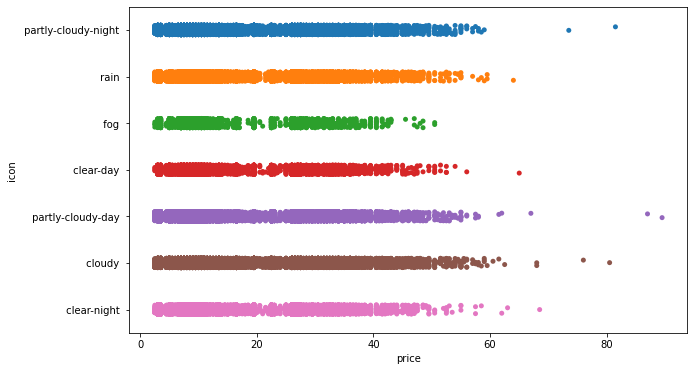

In [11]:
fig,ax = plt.subplots(figsize=(10,6))
sns.stripplot(data=uber_dataset, x='price', y='icon')

In [12]:
from datetime import datetime
timestamp1 = 1544952608
timestamp2 = 1543284024
timestamp3 = 1543818483
timestamp4 = 1543594384
timestamp5 = 1544728504
dt_object1 = datetime.fromtimestamp(timestamp1)
dt_object2 = datetime.fromtimestamp(timestamp2)
dt_object3 = datetime.fromtimestamp(timestamp3)
dt_object4 = datetime.fromtimestamp(timestamp4)
dt_object5 = datetime.fromtimestamp(timestamp5)

print("dt_object =", dt_object1)
print("dt_object =", dt_object2)
print("dt_object =", dt_object3)
print("dt_object =", dt_object4)
print("dt_object =", dt_object5)

dt_object = 2018-12-16 16:30:08
dt_object = 2018-11-27 09:00:24
dt_object = 2018-12-03 13:28:03
dt_object = 2018-11-30 23:13:04
dt_object = 2018-12-14 02:15:04


- Jadi dengan konversi stempel waktu ke tanggal waktu ini, kami mengetahui bahwa, data kami adalah tahun 2018 dan hanya di bulan november dan desember

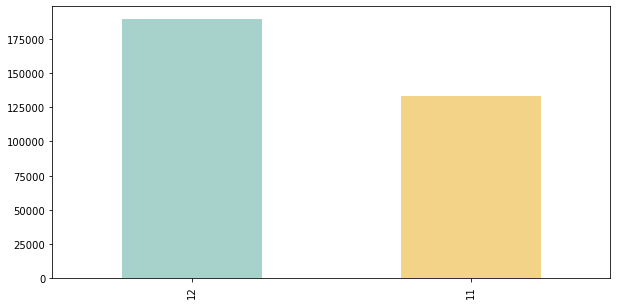

In [13]:
color = ['#A7D2CB','#F2D388','#C98474','#874C62','#7FB77E','#F7F6DC', '#FFC090']
uber_dataset['month'].value_counts().plot(kind='bar', figsize=(10,5), color=color);

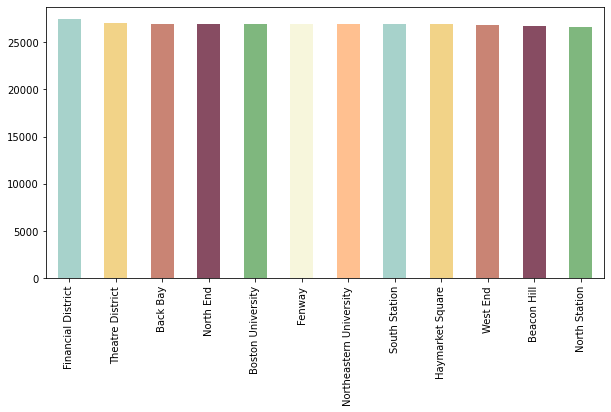

In [14]:
uber_dataset['source'].value_counts().plot(kind='bar', figsize=(10,5), color=color);

<AxesSubplot:>

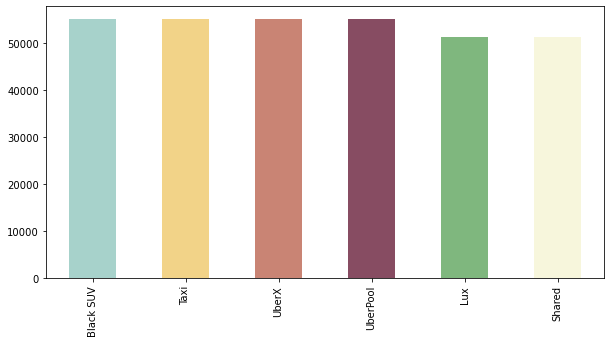

In [15]:
uber_dataset['name'].value_counts().plot(kind='bar', figsize=(10,5), color=color)

<AxesSubplot:>

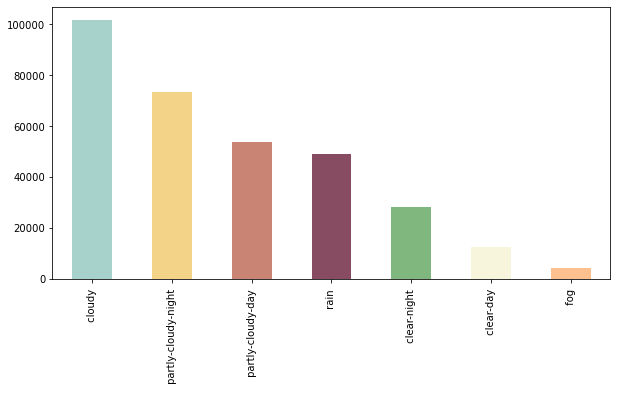

In [16]:
uber_dataset['icon'].value_counts().plot(kind='bar', figsize=(10,5),  color=color)

<AxesSubplot:>

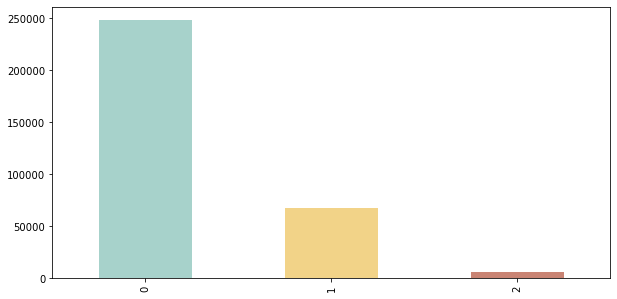

In [17]:
uber_dataset['uvIndex'].value_counts().plot(kind='bar', figsize=(10,5),  color=color)

<AxesSubplot:>

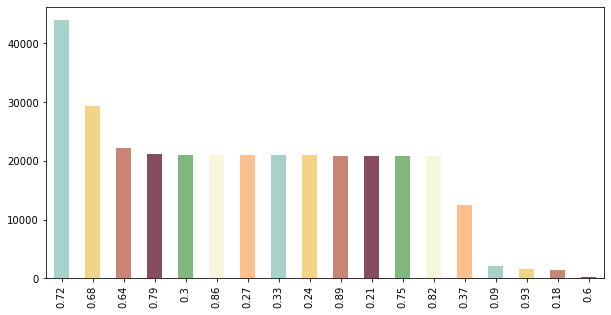

In [18]:
uber_dataset['moonPhase'].value_counts().plot(kind='bar', figsize=(10,5),  color=color)

<AxesSubplot:>

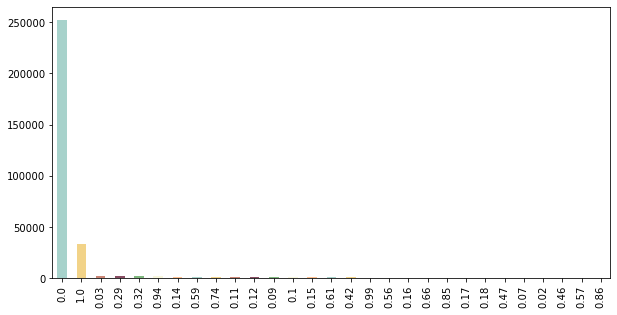

In [19]:
uber_dataset['precipProbability'].value_counts().plot(kind='bar', figsize=(10,5),  color=color)

### Label Encoder

In [20]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 

In [21]:
uber_dataset['id']= label_encoder.fit_transform(uber_dataset['id']) 
uber_dataset['cab_type']= label_encoder.fit_transform(uber_dataset['cab_type']) 
uber_dataset['datetime']= label_encoder.fit_transform(uber_dataset['datetime']) 
uber_dataset['timezone']= label_encoder.fit_transform(uber_dataset['timezone'])
uber_dataset['destination']= label_encoder.fit_transform(uber_dataset['destination']) 
uber_dataset['product_id']= label_encoder.fit_transform(uber_dataset['product_id'])
uber_dataset['short_summary']= label_encoder.fit_transform(uber_dataset['short_summary'])
uber_dataset['long_summary']= label_encoder.fit_transform(uber_dataset['long_summary'])

In [22]:
uber_dataset['name']= label_encoder.fit_transform(uber_dataset['name'])

print("Class mapping of Name: ")
for i, item in enumerate(label_encoder.classes_):
    print(item, "-->", i)

Class mapping of Name: 
Black SUV --> 0
Lux --> 1
Shared --> 2
Taxi --> 3
UberPool --> 4
UberX --> 5


In [23]:
uber_dataset['source']= label_encoder.fit_transform(uber_dataset['source'])

print("Class mapping of Source: ")
for i, item in enumerate(label_encoder.classes_):
    print(item, "-->", i)

Class mapping of Source: 
Back Bay --> 0
Beacon Hill --> 1
Boston University --> 2
Fenway --> 3
Financial District --> 4
Haymarket Square --> 5
North End --> 6
North Station --> 7
Northeastern University --> 8
South Station --> 9
Theatre District --> 10
West End --> 11


In [24]:
uber_dataset['icon']= label_encoder.fit_transform(uber_dataset['icon'])

print("Class mapping of Icon: ")
for i, item in enumerate(label_encoder.classes_):
    print(item, "-->", i)

Class mapping of Icon: 
 clear-day  --> 0
 clear-night  --> 1
 cloudy  --> 2
 fog  --> 3
 partly-cloudy-day  --> 4
 partly-cloudy-night  --> 5
 rain  --> 6


In [25]:
uber_dataset.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

In [26]:
# mengisi missing value pada price dengan nilai tengah tujuannya agar data tidak ter strach karna outlier ketika dilakukan pemodelan
uber_dataset['price'].median()

10.5

In [27]:
uber_dataset["price"].fillna(10.5, inplace = True) 

In [28]:
#uber_dataset['price'] = uber_dataset['price'].astype(int)

In [29]:
uber_dataset.isnull().sum()

id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatur

# Feature Selection

### RFE (Recursive Feature Elimination)

In [30]:
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.feature_selection import RFE
from sklearn import ensemble

In [31]:
X = uber_dataset.drop('price', axis = 1)
y = uber_dataset['price']

In [32]:
y.head()

0      5.0
1     11.0
8      3.0
10    13.5
14     7.5
Name: price, dtype: float64

In [33]:
X.shape

(322844, 56)

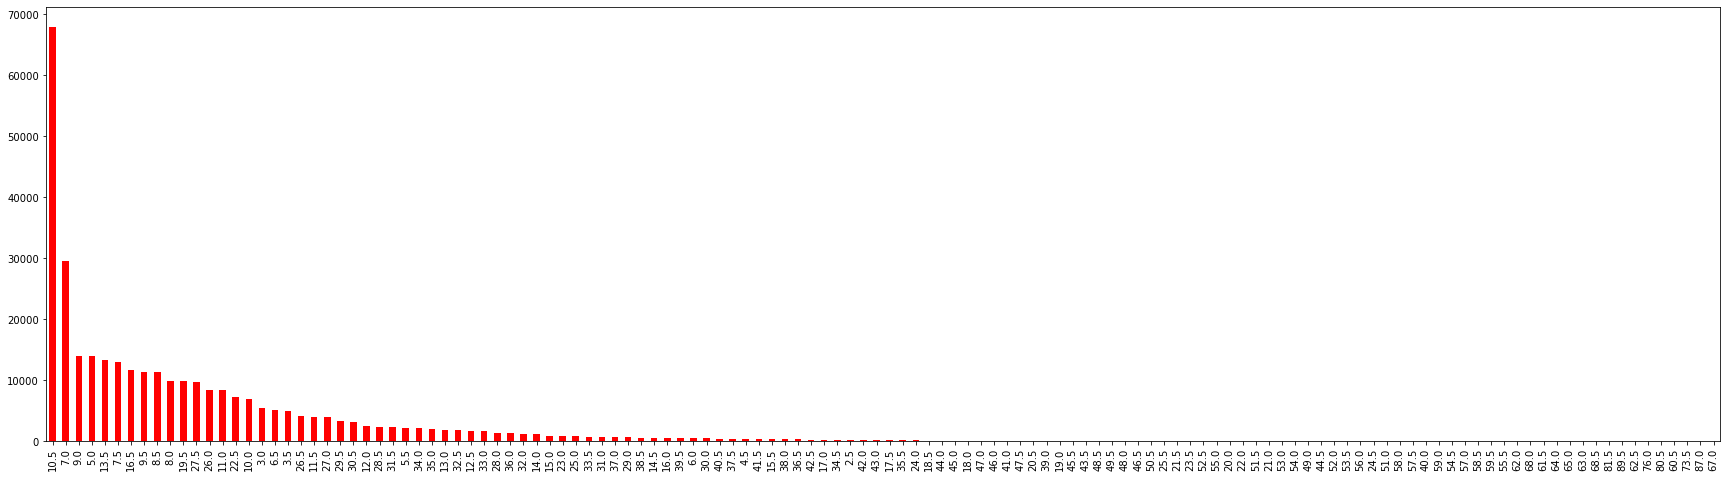

In [34]:
y.value_counts().plot(kind='bar',figsize=(30,8),color='red');

In [35]:
uber_dataset.price.unique()

array([ 5. , 11. ,  3. , 13.5,  7.5, 26. ,  5.5, 10.5,  3.5,  8.5,  7. ,
       27.5, 19.5, 29.5,  9.5,  9. , 16.5, 10. , 34. , 36. , 12. , 32.5,
       35. ,  8. , 27. , 14. , 38.5, 30.5, 36.5, 12.5, 33.5, 15. , 22.5,
       33. , 32. ,  6.5, 26.5, 11.5, 31.5, 28.5, 29. , 31. , 13. , 41. ,
       38. , 28. , 24. , 37.5, 17.5, 23. , 25. , 30. ,  4.5, 40.5, 42. ,
       46.5, 15.5, 50.5, 18. , 41.5, 25.5, 39. , 20. , 21.5, 39.5, 14.5,
        6. , 35.5, 48.5, 16. , 45. , 42.5, 37. , 44. , 34.5,  2.5, 17. ,
       46. , 48. , 47. , 20.5, 54. , 56. , 52. , 62. , 55. , 43. , 18.5,
       43.5, 45.5, 51.5, 40. , 49.5, 58. , 21. , 23.5, 19. , 47.5, 22. ,
       52.5, 24.5, 87. , 44.5, 53. , 81.5, 49. , 73.5, 51. , 55.5, 53.5,
       60.5, 59. , 57.5, 80.5, 54.5, 76. , 57. , 62.5, 89.5, 63. , 61.5,
       68. , 58.5, 68.5, 59.5, 65. , 64. , 67. ])

#### Training accuracy in 56 features

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [37]:
uber_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 322844 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           322844 non-null  int32  
 1   timestamp                    322844 non-null  float64
 2   hour                         322844 non-null  int64  
 3   day                          322844 non-null  int64  
 4   month                        322844 non-null  int64  
 5   datetime                     322844 non-null  int32  
 6   timezone                     322844 non-null  int32  
 7   source                       322844 non-null  int32  
 8   destination                  322844 non-null  int32  
 9   cab_type                     322844 non-null  int32  
 10  product_id                   322844 non-null  int32  
 11  name                         322844 non-null  int32  
 12  price                        322844 non-null  float64
 13 

In [38]:
#Creating model
reg = LinearRegression()
#Fitting training data
reg = reg.fit(X_train, y_train)
reg.score(X_train, y_train)

0.8313965310739319

In [39]:
#Feature Selection for modeling
rfe = RFE(reg, n_features_to_select=25, verbose=1)
rfe = rfe.fit(X, y)

Fitting estimator with 56 features.
Fitting estimator with 55 features.
Fitting estimator with 54 features.
Fitting estimator with 53 features.
Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 fe

In [40]:
X.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'distance',
       'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperatureMax', 

In [41]:
XX = X[X.columns[rfe.support_]]
XX.head()

,source,destination,cab_type,product_id,name,distance,surge_multiplier,latitude,longitude,temperature,...,windGust,temperatureHigh,apparentTemperatureHigh,icon,dewPoint,cloudCover,moonPhase,precipIntensityMax,temperatureMax,apparentTemperatureMax
0,5,7,0,4,2,0.44,1.0,42.2148,-71.0330,42.34,...,9.17,43.68,37.95,5,32.70,0.72,0.30,0.1276,43.68,38.07
1,5,7,0,5,1,0.44,1.0,42.2148,-71.0330,43.58,...,11.98,47.30,43.92,6,41.83,1.00,0.64,0.1300,47.30,43.92
8,0,8,0,4,2,1.08,1.0,42.3503,-71.0810,45.58,...,2.09,57.02,56.35,3,44.50,1.00,0.89,0.0004,57.02,56.35
10,0,8,0,5,1,1.08,1.0,42.3503,-71.0810,40.13,...,4.47,42.32,40.48,0,27.99,0.12,0.79,0.0004,42.32,40.48
14,6,11,1,0,5,1.11,1.0,42.3647,-71.0542,32.85,...,3.83,33.83,32.85,4,18.66,0.64,0.21,0.0001,33.83,32.85


### Drop Useless Features

In [42]:
XX.columns

Index(['source', 'destination', 'cab_type', 'product_id', 'name', 'distance',
       'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'precipIntensity', 'precipProbability',
       'humidity', 'windSpeed', 'windGust', 'temperatureHigh',
       'apparentTemperatureHigh', 'icon', 'dewPoint', 'cloudCover',
       'moonPhase', 'precipIntensityMax', 'temperatureMax',
       'apparentTemperatureMax'],
      dtype='object')

In [43]:
features_drop = ['latitude', 'longitude', 'apparentTemperature',
        'precipIntensity', 'humidity', 'windSpeed', 'windGust',
       'temperatureHigh', 'apparentTemperatureHigh', 'dewPoint','precipIntensityMax',
       'temperatureMax', 'apparentTemperatureMax', 'distance', 'cloudCover', 'moonPhase']
new_uber = XX.drop(features_drop, axis=1)

In [44]:
new_uber.head()

,source,destination,cab_type,product_id,name,surge_multiplier,temperature,precipProbability,icon
0,5,7,0,4,2,1.0,42.34,0.0,5
1,5,7,0,5,1,1.0,43.58,1.0,6
8,0,8,0,4,2,1.0,45.58,0.0,3
10,0,8,0,5,1,1.0,40.13,0.0,0
14,6,11,1,0,5,1.0,32.85,0.0,4


### Binning

In [45]:
surge_multiplier_mapping = {1.: 0, 1.25: 1, 1.5: 2, 1.75: 3, 2.:4}
new_uber['surge_multiplier'] = new_uber['surge_multiplier'].map(surge_multiplier_mapping)

In [46]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
xx_train, xx_test, yy_train, yy_test = train_test_split(new_uber, y, test_size = 0.2, random_state = 42)

# Modeling

## Linear Regression

In [47]:
linear = LinearRegression()
linear.fit(xx_train, yy_train)
linear.score(xx_test, yy_test)

0.7734562961310718

## Decission Tree

In [48]:
decision = DecisionTreeRegressor(random_state = 0)  
decision.fit(xx_train , yy_train) 
decision.score(xx_test, yy_test)

0.94609454231467

## Random Forest

In [49]:
random = RandomForestRegressor(n_estimators = 10, random_state = 0) 
random.fit(xx_train , yy_train)  
random.score(xx_test, yy_test)

0.9529507006536303

## Support Vector Regressor

In [50]:
# random = SVR() 
# random.fit(xx_train , yy_train)  
# random.score(xx_test, yy_test)

In [51]:
prediction = decision.predict(xx_test)
prediction

array([10.5, 10.5,  5. , ..., 33. , 29.5, 10.5])

Text(0, 0.5, 'Predicted Y')

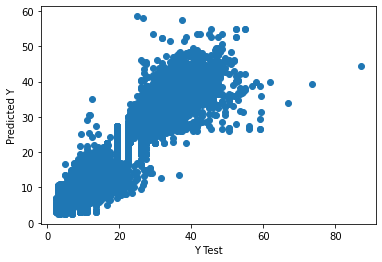

In [52]:
plt.scatter(yy_test,prediction)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [53]:
from sklearn import metrics
print('MAE :'," ", metrics.mean_absolute_error(yy_test,prediction))
print('MSE :'," ", metrics.mean_squared_error(yy_test,prediction))
print('RMAE :'," ", np.sqrt(metrics.mean_squared_error(yy_test,prediction)))

MAE :   1.1682553528006647
MSE :   4.2231324813604
RMAE :   2.055026151016186


<AxesSubplot:xlabel='price', ylabel='Density'>

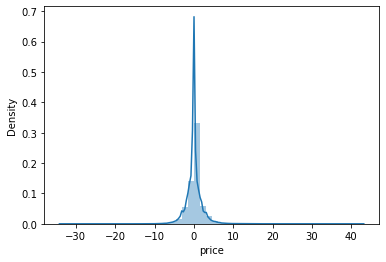

In [54]:
sns.distplot(yy_test - prediction,bins=50)

#### Random Forest

In [55]:
predictions = random.predict(xx_test)

Text(0, 0.5, 'Predicted Y')

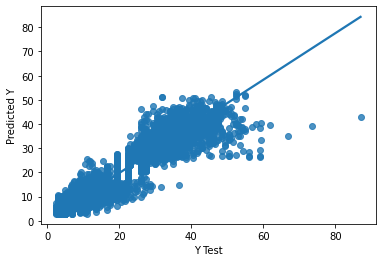

In [56]:
sns.regplot(yy_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [57]:
from sklearn import metrics
print('MAE random forest:'," ", metrics.mean_absolute_error(yy_test,predictions))
print('MSE random forest:'," ", metrics.mean_squared_error(yy_test,predictions))
print('RMAE random forest:'," ", np.sqrt(metrics.mean_squared_error(yy_test,predictions)))

MAE random forest:   1.1160084814749298
MSE random forest:   3.685998279706216
RMAE random forest:   1.919895382489946


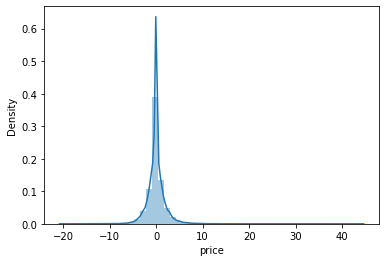

In [58]:
sns.distplot(yy_test - predictions,bins=50);

## Conclusion

Dari hasil matriks evaluasi didapatkan bahwa Random forest memiliki error yang lebih sedikit dibandingkan decission trees, ini bisa jadi indikasi bahwa semakin banyak variable kolom yang digunakan maka akan semakin bagus juga akurasi yang dihasilkan terhadap random forest, sedangkan akurasinya pun juga jah lebih baik ketimbang decission trees dan linear regression, jadi disini saya menggunakan model random forest untuk pemilihan model yang optimal nya.

## Model Inference

In [59]:
def predict_price(name, source, surge_multiplier,icon):    
    loc_index = np.where(new_uber.columns==name)[0]
    
    x = np.zeros(len(new_uber.columns))
    x[4] = name
    x[0] = source
    x[5] = surge_multiplier
    x[8] = icon
    if loc_index >= 0:
        x[loc_index] = 1
    
    return random.predict([x])[0]

####  <span style='background:yellow'>Follow  these instructions before predicting the price:</span> 
<hr>

-  **For cab_name**:  <font color = 'red'>Black SUV --> 0 , Lux --> 1 , Shared --> 2 , Taxi --> 3 , UberPool --> 4 , UberX --> 5</font>


- **For Source**:  <font color = 'blue'>Back Bay --> 0 , Beacon Hill --> 1 , Boston University --> 2 , Fenway --> 3 , Financial District --> 4 , Haymarket Square --> 5 , North End --> 6 , North Station --> 7 , Northeastern University --> 8 , South Station --> 9 , Theatre District --> 10 , West End --> 11</font>


- **For Surge_multiplier** : <font color = 'red'>Enter Surge Multiplier value from 0 to 4</font>


- **for Icon**:  <font color = 'blue'>clear-day  --> 0 , clear-night  --> 1 , cloudy  --> 2 , fog  --> 3 , partly-cloudy-day  --> 4 , partly-cloudy-night  --> 5 , rain  --> 6</font>


In [60]:
predict_price(1, 3, 2, 0)

16.85

# Save Model

In [61]:
# import pickle
  
# # Save the trained model as a pickle string.
# saved_model = pickle.dumps(random)
# pickle.dump(random, open('model_regressor.pkl','wb'))

# # Load the pickled model
# random_regressor = pickle.loads(saved_model)
  
# # Use the loaded pickled model to make predictions
# random_regressor.predict(xx_test)